# Prodigy Infotech Internship

Task 3: Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.


**Done By:** Puneeth S    
**Email:**   Puneeths023@gmail.com

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('bank_full.csv',sep=';')

In [3]:
data

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [4]:
data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [5]:
data.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
data.isnull()

age    job  marital  education  default  balance  housing   loan  \
0      False  False    False      False    False    False    False  False   
1      False  False    False      False    False    False    False  False   
2      False  False    False      False    False    False    False  False   
3      False  False    False      False    False    False    False  False   
4      False  False    False      False    False    False    False  False   
...      ...    ...      ...        ...      ...      ...      ...    ...   
45206  False  False    False      False    False    False    False  False   
45207  False  False    False      False    False    False    False  False   
45208  False  False    False      False    False    False    False  False   
45209  False  False    False      False    False    False    False  False   
45210  False  False    False      False    False    False    False  False   

       contact    day  month  duration  campaign  pdays  previous  poutcome  \
0        False  False  False     False     False  False     False     False   
1        False  False  False     False     False  False     False     False   
2        False  False  False     False     False  False     False     False   
3        False  False  False     False     False  False     False     False   
4        False  False  False     False     False  False     False     False   
...        ...    ...    ...       ...       ...    ...       ...       ...   
45206    False  False  False     False     False  False     False     False   
45207    False  False  False     False     False  False     False     False   
45208    False  False  False     False     False  False     False     False   
45209    False  False  False     False     False  False     False     False   
45210    False  False  False     False     False  False     False     False   

           y  
0      False  
1      False  
2      False  
3      False  
4      False  
...      ...  
45206  False  
45207  False  
45208  False  
45209  False  
45210  False  

[45211 rows x 17 columns]

In [9]:
data_1 = data.drop_duplicates()
data_1

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [10]:
data_1.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=data.drop('poutcome', axis=1)
X=pd.get_dummies(X)
X

age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0       58     2143    5       261         1     -1         0       False   
1       44       29    5       151         1     -1         0       False   
2       33        2    5        76         1     -1         0       False   
3       47     1506    5        92         1     -1         0       False   
4       33        1    5       198         1     -1         0       False   
...    ...      ...  ...       ...       ...    ...       ...         ...   
45206   51      825   17       977         3     -1         0       False   
45207   71     1729   17       456         2     -1         0       False   
45208   72     5715   17      1127         5    184         3       False   
45209   57      668   17       508         4     -1         0       False   
45210   37     2971   17       361         2    188        11       False   

       job_blue-collar  job_entrepreneur  ...  month_jan  month_jul  \
0                False             False  ...      False      False   
1                False             False  ...      False      False   
2                False              True  ...      False      False   
3                 True             False  ...      False      False   
4                False             False  ...      False      False   
...                ...               ...  ...        ...        ...   
45206            False             False  ...      False      False   
45207            False             False  ...      False      False   
45208            False             False  ...      False      False   
45209             True             False  ...      False      False   
45210            False              True  ...      False      False   

       month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
0          False      False       True      False      False      False   
1          False      False       True      False      False      False   
2          False      False       True      False      False      False   
3          False      False       True      False      False      False   
4          False      False       True      False      False      False   
...          ...        ...        ...        ...        ...        ...   
45206      False      False      False       True      False      False   
45207      False      False      False       True      False      False   
45208      False      False      False       True      False      False   
45209      False      False      False       True      False      False   
45210      False      False      False       True      False      False   

        y_no  y_yes  
0       True  False  
1       True  False  
2       True  False  
3       True  False  
4       True  False  
...      ...    ...  
45206  False   True  
45207  False   True  
45208  False   True  
45209   True  False  
45210   True  False  

[45211 rows x 49 columns]

In [13]:
y=data['poutcome']
y

0        unknown
1        unknown
2        unknown
3        unknown
4        unknown
          ...   
45206    unknown
45207    unknown
45208    success
45209    unknown
45210      other
Name: poutcome, Length: 45211, dtype: object

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder

In [16]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
predict = DT.predict(X_test)
accuracy = accuracy_score(y_test,predict)
print("The Accurate value is =", accuracy)

The Accurate value is = 0.9172840871392237


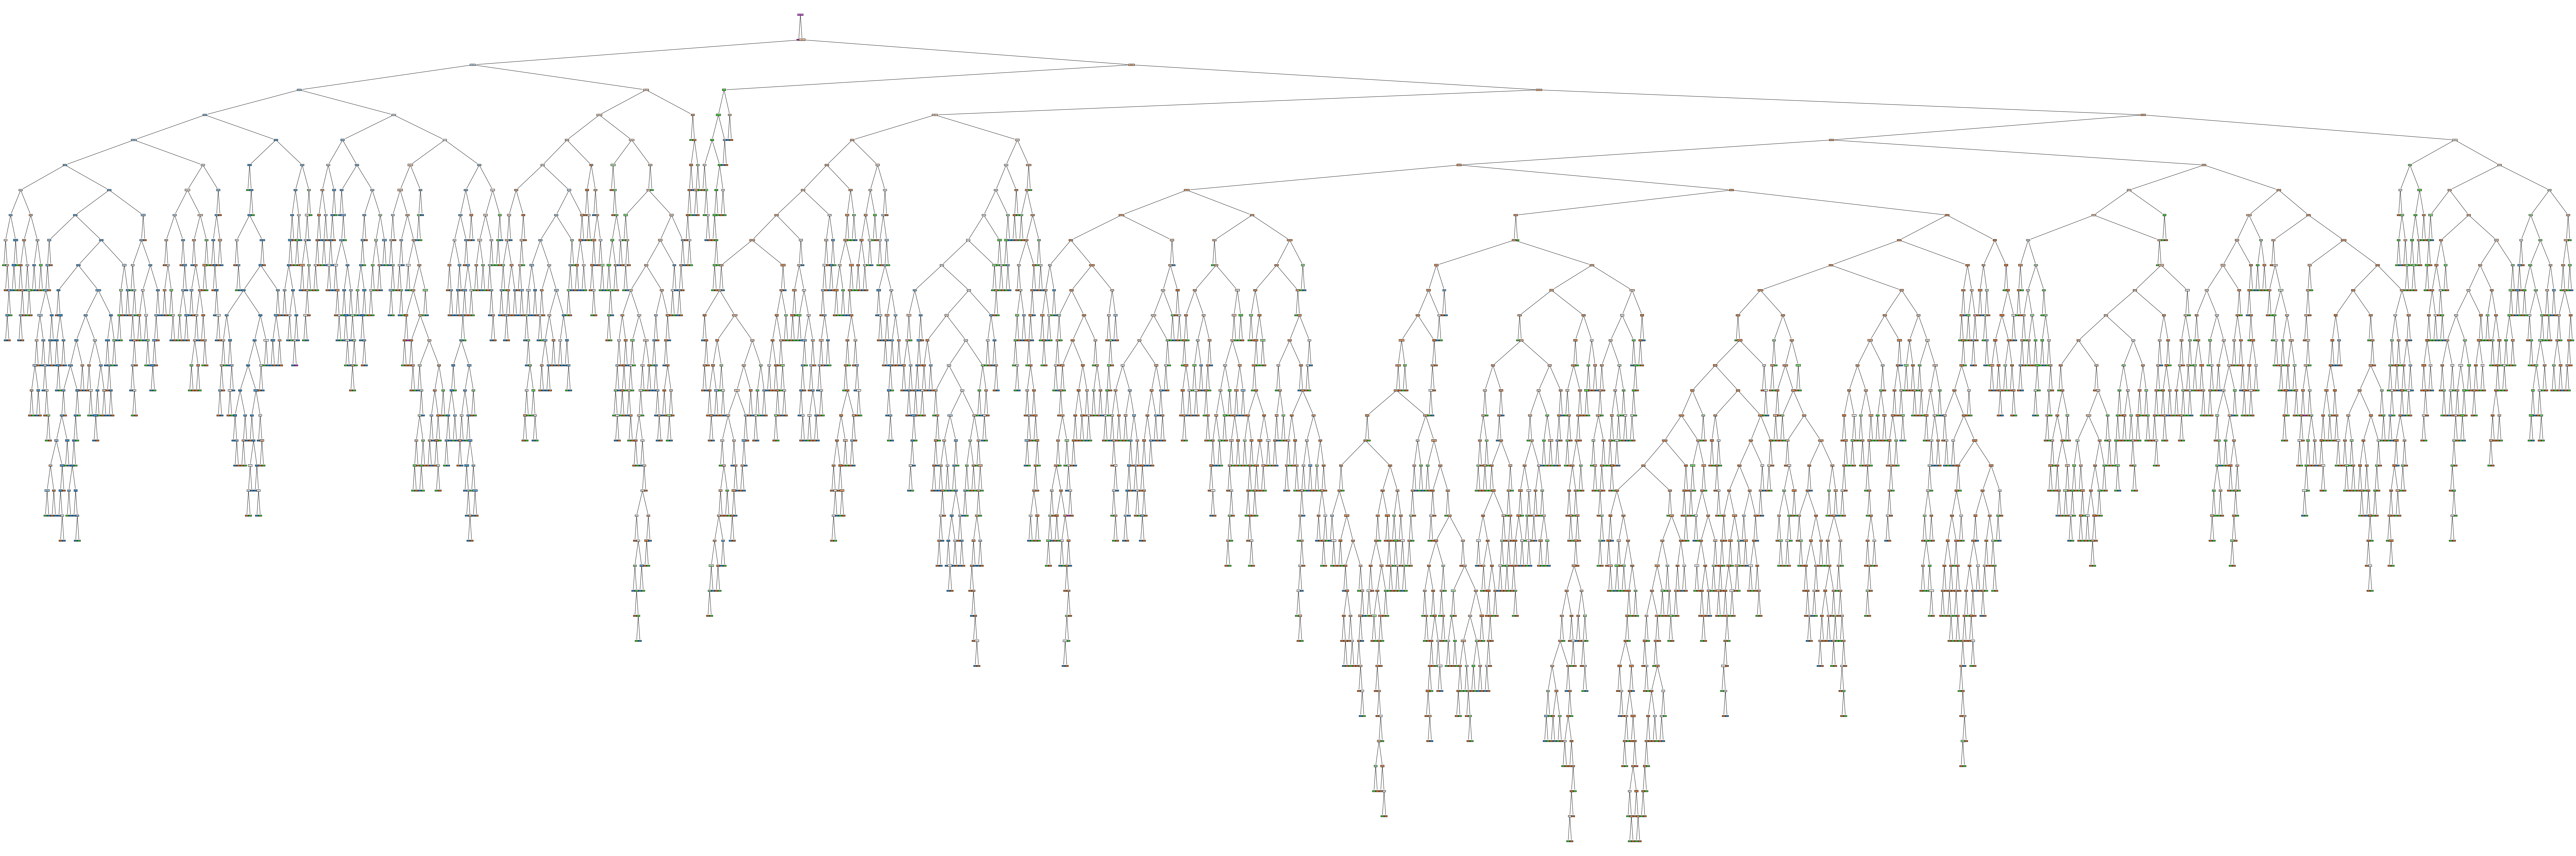

In [23]:
plt.figure(figsize=(150,50))
plot_tree(DT,feature_names=list(X.columns), class_names=data['education'].unique().tolist(),filled=True,rounded=True)
plt.show()

In [19]:
DT_clf=DecisionTreeClassifier(ccp_alpha=0.006,random_state=42)
DT_clf.fit(X_train,y_train)
y_pred_train=DT_clf.predict(X_train)
y_pred_test=DT_clf.predict(X_test)
print("Training Accuracy=",accuracy_score(y_train,y_pred_train),"\n Testing Accuracy=",accuracy_score(y_test,y_pred_test))

Training Accuracy= 0.9328135368281354 
 Testing Accuracy= 0.9374101514983966


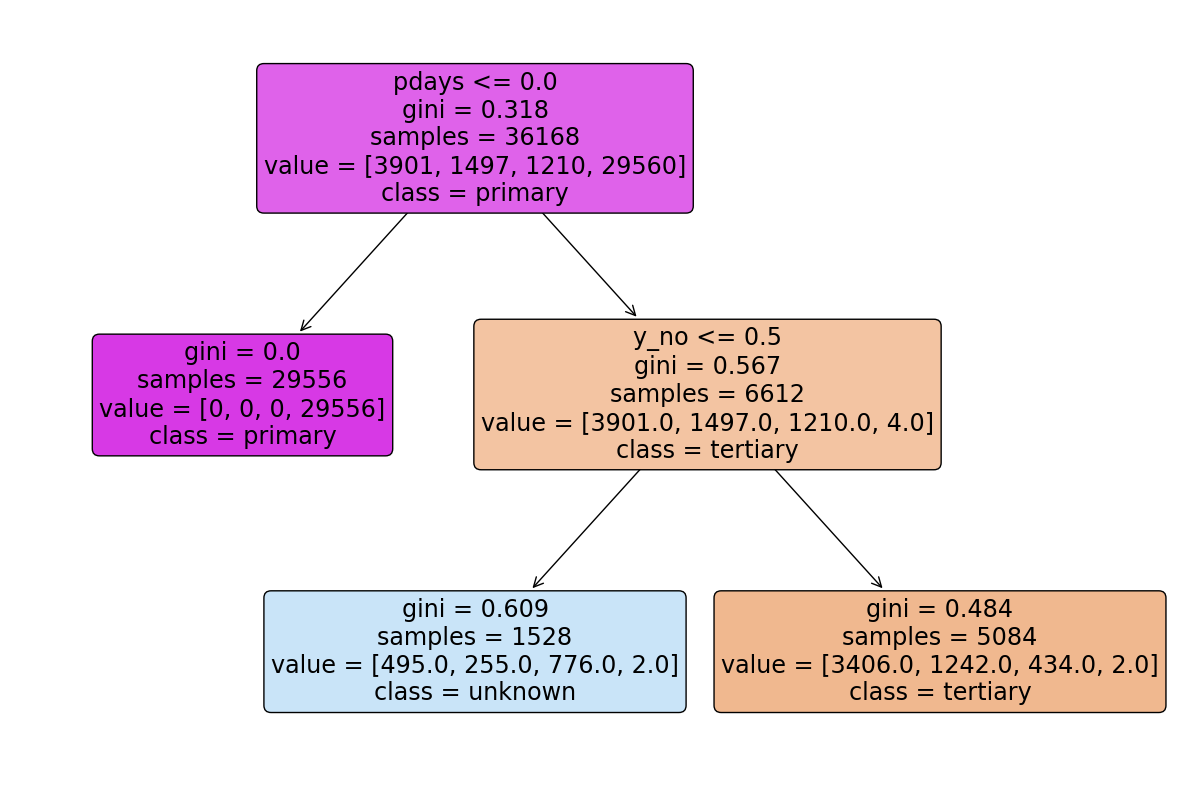

In [20]:
plt.figure(figsize=(15,10))
tree.plot_tree(DT_clf,feature_names=list(X.columns),class_names=data['education'].unique().tolist(),filled=True,rounded=True)
plt.show()